In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train_obesity.csv')
df_test = pd.read_csv('test_obesity.csv')

In [3]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [5]:
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
change_train_col = {'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,'Insufficient_Weight':3,
                   'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}
df_train.replace({'NObeyesdad':change_train_col},inplace=True)

In [7]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,2
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,0
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,3
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,2


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
CAT_OBJ_COL_TRAIN = [col for col in df_train.columns if df_train[col].dtype=='object']
CAT_OBJ_COL_TEST = [col2 for col2 in df_test.columns if df_test[col2].dtype=='object']
CAT_OBJ_COL_TRAIN

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for data1 in CAT_OBJ_COL_TRAIN:
    df_train[data1] = le.fit_transform(df_train[data1])

for data2 in CAT_OBJ_COL_TEST:
    df_test[data2] = le.fit_transform(df_test[data2])

In [11]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,2
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,3
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,6
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,5
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,3
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,5
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,2


In [12]:
df_train.drop(['id'],axis=1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,2
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,3
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,6
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,5
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,3
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,5
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,2


<Axes: xlabel='Gender', ylabel='Age'>

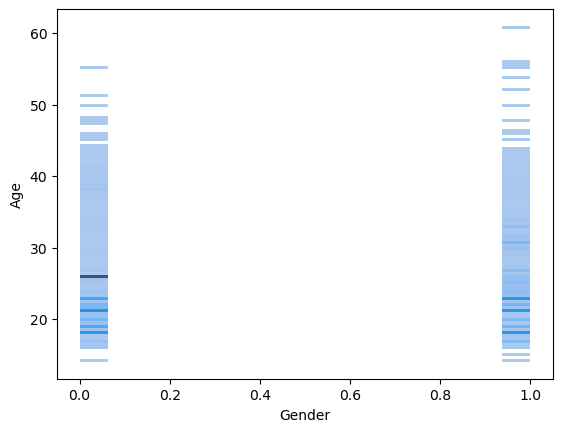

In [13]:
sns.histplot(x=df_train.Gender, y=df_train.Age)

In [14]:
corr = df_train.corr()
corr.NObeyesdad.sort_values(ascending=False)

NObeyesdad                        1.000000
Weight                            0.768881
family_history_with_overweight    0.383202
FCVC                              0.333537
CAEC                              0.244450
Age                               0.236337
FAVC                              0.221060
CH2O                              0.212141
Height                            0.143434
NCP                               0.085167
MTRANS                            0.037979
id                                0.019019
SMOKE                            -0.001510
TUE                              -0.069243
Gender                           -0.140713
SCC                              -0.146391
CALC                             -0.151151
FAF                              -0.218736
Name: NObeyesdad, dtype: float64

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

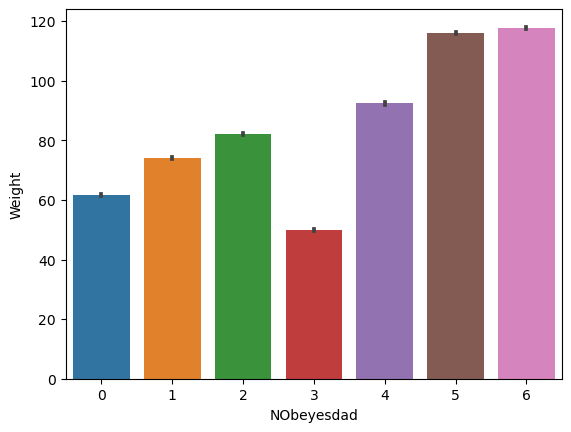

In [15]:
sns.barplot(x=df_train.NObeyesdad, y=df_train.Weight)

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

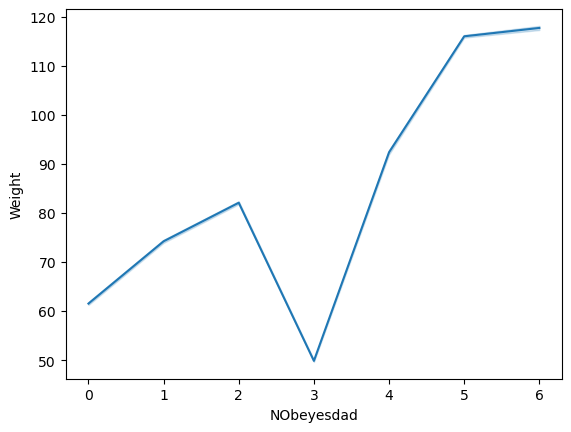

In [16]:
sns.lineplot(x=df_train.NObeyesdad, y=df_train.Weight)

In [17]:
#split data
x = df_train.drop(['NObeyesdad'],axis=1)
y = df_train.NObeyesdad
print(x)
print(y)

          id  Gender        Age    Height      Weight  \
0          0       1  24.443011  1.699998   81.669950   
1          1       0  18.000000  1.560000   57.000000   
2          2       0  18.000000  1.711460   50.165754   
3          3       0  20.952737  1.710730  131.274851   
4          4       1  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753       1  25.137087  1.766626  114.187096   
20754  20754       1  18.000000  1.710000   50.000000   
20755  20755       1  20.101026  1.819557  105.580491   
20756  20756       1  33.852953  1.700000   83.520113   
20757  20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     2      0   
1                                   1     1  2.000000  3.000000     1      0   
2                                   1     1  1.880534  1.411685     2      

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((16606, 17), (4152, 17), (16606,), (4152,))

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=30, criterion='gini')

In [23]:
model.fit(Xtrain, Ytrain)
model.score(Xtest, Ytest)

0.8945086705202312

In [30]:
# Assuming le is the label encoder used during training
# Fit the label encoder on the entire label space (training + test)
le.fit(df_train['NObeyesdad'])

# Predict on the test set
y_pred1 = pd.DataFrame({"NObeyesdad": model.predict(df_test)})

# Transform the numerical predictions back to their original labels
list_of_predicted_values = le.inverse_transform(y_pred1["NObeyesdad"])

# Create the result DataFrame
result = pd.DataFrame({"id": df_test['id'], "NObeyesdad": list_of_predicted_values})

# Save the result to CSV
result.to_csv("submission.csv", index=False)

In [31]:
fileFix = pd.read_csv('submission.csv')
fileFix

,id,NObeyesdad
0,20758,5
1,20759,1
2,20760,6
3,20761,4
4,20762,6
...,...,...
13835,34593,2
13836,34594,1
13837,34595,3
13838,34596,0


In [32]:
change_train_col = {0:'Normal_Weight', 1:'Overweight_Level_I', 2:'Overweight_Level_II',3:'Insufficient_Weight',
                   4:'Obesity_Type_I', 5:'Obesity_Type_II', 6:'Obesity_Type_III'}
fileFix.replace({'NObeyesdad':change_train_col},inplace=True)

In [33]:
fileFix

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [35]:
fileFix.to_csv('Hoang-submit-file.csv',index=False)